# Predicting CHOP inhibitors with 13C NMR spectroscopic data. Dataset 2.

## Content   <a name="content"></a>

1. [Upload and process H1 NMR spectroscopy data](#1)
2. [Create a dataframe merging the C13and H1 NMR data frames to the data frame holding the labels](#2)
3. [Ensure an equal number of classes in the test sets](#3)
4. [Balancing](#4)
5. [Machine Learning](#5)
6. [Five-fold cross validation](#6)
7. [Scrutinise for overfitting of the MLmodel with default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’](#7)
8. [Hyperparameter tununing by Optuna](#8)
9.  [Scrutinise for overfitting using hyperparameter tuned by Optuna](#9)
10. [Final ML model](#10)
11. [Plot the learning curve and ROC](#11)
12. [Confusion matrix, classification report and AUC](#12)

## Upload and process H1 NMR spectroscopy data <a name="1"></a>

In [1]:
import pandas as pd

# load the converted nmr dataset
df_C13 = pd.read_csv('output_C13_extensive.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (20309, 3001)


SMILES  0  1  2  3  4  5  6  7  \
0         C/C(=N/NC(=O)CNC(=O)C1=CC=NC=C1)/C2=CC=CO2  0  0  0  0  0  0  0  0   
1       CC1=CC(=CC=C1)NC(=O)COC2=CC=CC3=C2CCN(C3=O)C  0  0  0  0  0  0  0  0   
2         CC1=CC(=CC=C1)C2=NSC(=N2)SCC(=O)NC3=NC=CS3  0  0  0  0  0  0  0  0   
3  CC(C)CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)CC23CC4...  0  0  0  0  0  0  0  0   
4                        CC(C(=O)O)N1C2=CC=CC=C2N=N1  0  0  0  0  0  0  0  0   

   8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  \
0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0   

   102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0 

In [2]:
# Identify columns with only zeros
columns_to_drop = df_C13.columns[df_C13.eq(0).all()]

In [3]:
# Drop the columns
df_C13 = df_C13.drop(columns_to_drop, axis=1)

In [4]:
# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (20309, 1928)


SMILES  28  35  39  42  54  55  \
0         C/C(=N/NC(=O)CNC(=O)C1=CC=NC=C1)/C2=CC=CO2   0   0   0   0   0   0   
1       CC1=CC(=CC=C1)NC(=O)COC2=CC=CC3=C2CCN(C3=O)C   0   0   0   0   0   0   
2         CC1=CC(=CC=C1)C2=NSC(=N2)SCC(=O)NC3=NC=CS3   0   0   0   0   0   0   
3  CC(C)CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)CC23CC4...   0   0   0   0   0   0   
4                        CC(C(=O)O)N1C2=CC=CC=C2N=N1   0   0   0   0   0   0   

   59  65  66  67  68  70  71  72  73  74  75  77  79  80  81  82  83  84  85  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   86  87  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   

   104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    

[<a href="#content">Back to top</a>]

## Create a dataframe merging the NMR data frame to the data frame holding the labels  <a name="2"></a>

In [5]:
# load the dataset with targets
df_targets = pd.read_csv('input/targets.csv')

# Display the data frame
print('Shape of df_targets: ', df_targets.shape)
df_targets.head()

Shape of df_targets:  (20316, 2)


,SMILES,target
0,CCOC1=CC=C(C=C1)NC(=O)NNC(=O)C2=C(C=C(C=C2)Cl)Cl,0
1,CC(C(C)(C)C)NC(=S)NC1=CC(=C(C=C1)OC(F)F)Cl,0
2,CC1=C2CCCCC2=C3C(=C(SC3=N1)C(=O)N)N,0
3,CC1=CC2=C(C=C1)NC3=C2CCC4=C3NN=C4,0
4,CN(C)S(=O)(=O)C1=CC=C(C=C1)C2=CSC(=N2)N/N=C/C3...,0


In [6]:
# Merge the target and nmr data 
df = pd.merge( df_C13, df_targets, on='SMILES', how='inner')

In [7]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (20309, 1929)


SMILES  28  35  39  42  54  55  \
0         C/C(=N/NC(=O)CNC(=O)C1=CC=NC=C1)/C2=CC=CO2   0   0   0   0   0   0   
1       CC1=CC(=CC=C1)NC(=O)COC2=CC=CC3=C2CCN(C3=O)C   0   0   0   0   0   0   
2         CC1=CC(=CC=C1)C2=NSC(=N2)SCC(=O)NC3=NC=CS3   0   0   0   0   0   0   
3  CC(C)CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)CC23CC4...   0   0   0   0   0   0   
4                        CC(C(=O)O)N1C2=CC=CC=C2N=N1   0   0   0   0   0   0   

   59  65  66  67  68  70  71  72  73  74  75  77  79  80  81  82  83  84  85  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   86  87  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   

   104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  \
0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    

In [8]:
# df.info()

In [9]:
df.drop(columns=['SMILES'], axis=1, inplace=True)

In [10]:
unique_count = df['target'].unique()
print("The unique values in column 'target:", unique_count)

The unique values in column 'target: [0 1]


In [11]:
# # Drop rows with any NaN values
# df = df.dropna()

In [12]:
# Count each of the binary targets
df['target'].value_counts()

target
0    12091
1     8218
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="3"></a>

In [13]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:2100]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[2100:]

In [14]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 2800 samples (10% of 28000 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:2100]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[2100:]

In [15]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [16]:
# Create the sets for ML 
X_train = train.drop(columns='target' , axis=1)
y_train = train['target']

X_test =  test.drop(columns='target' , axis=1)
y_test = test['target']

In [17]:
# Create X and y datasets to use for cross-validation
X = pd.concat([X_train, X_test]) 
y = pd.concat([y_train, y_test]) 

In [18]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    2100
1    2100
Name: count, dtype: int64

In [19]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (16109, 1927)
X_test:   (4200, 1927)
y_train:  (16109,)
y_test:   (4200,)


[<a href="#content">Back to top</a>]

## Balancing <a name="4"></a>

[(0, 9991), (1, 6118)]


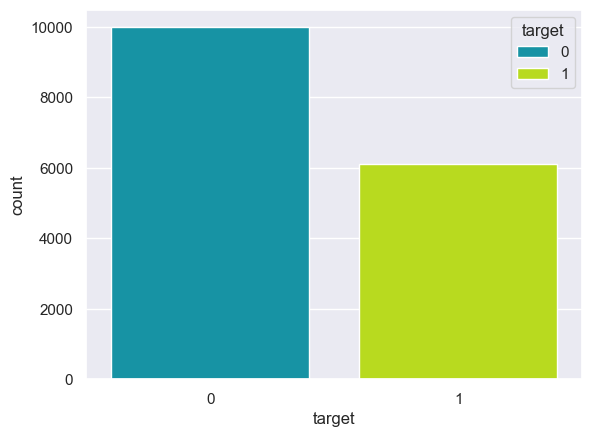

In [20]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 9991), (1, 9991)]


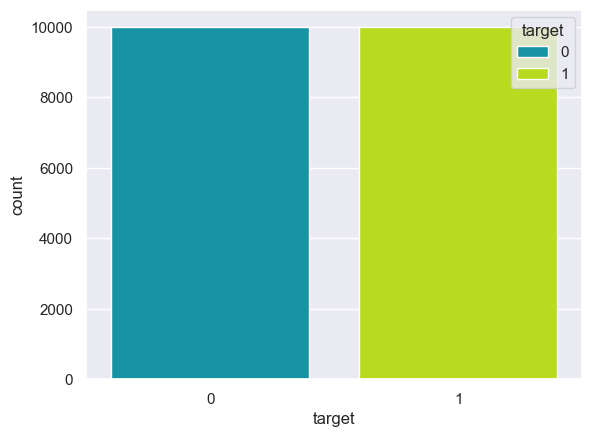

In [21]:
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Synthetic Minority Oversampling Technique
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [22]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (19982, 1927)
X_test:   (4200, 1927)
y_train:  (19982,)
y_test:   (4200,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="5"></a>

In [23]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "K-nearest": KNeighborsClassifier(n_neighbors=3)}

In [24]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
0,SVM,0.793,0.826,0.741,0.782,0.793
2,RandomForest,0.711,0.854,0.510,0.639,0.711
3,GradientBoost,0.673,0.696,0.613,0.652,0.673
1,Decision,0.653,0.683,0.572,0.623,0.653
4,K-nearest,0.644,0.789,0.392,0.524,0.644


[<a href="#content">Back to top</a>]

## Five-fold cross-validation  <a name="6"></a>

In [25]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.8635,0.0555,"[0.8196, 0.8189, 0.8163, 0.9284, 0.9344]"
0,SVM,0.8455,0.0192,"[0.8366, 0.8264, 0.8276, 0.8714, 0.8656]"
1,Decision,0.7868,0.0511,"[0.7518, 0.7401, 0.7437, 0.8481, 0.8504]"
4,K-nearest,0.7287,0.0405,"[0.7005, 0.7003, 0.6879, 0.7678, 0.787]"
3,GradientBoost,0.6792,0.0049,"[0.6813, 0.6743, 0.6727, 0.6854, 0.6822]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the ML model with its default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’ <a name="7"></a>

In [26]:
# Instantiate the model
model = SVC()

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.8455123625001033
Test accuracy: 0.7928571428571428


[<a href="#content">Back to top</a>]

## Hyperparameter tuning with Optuna <a name="8"></a>

In [35]:
import optuna
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the objective function and suggest hyperparameters values
def objective(trial):
    svc_c = trial.suggest_float('C', 1e-10, 1e10, log=True)
    svc_gamma = trial.suggest_float('gamma', 1e-10, 1e10,log=True)
    clf = SVC(C=svc_c, gamma=svc_gamma)
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3).mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Print the best set of hyperparameters
print('Best hyperparameters: ', study.best_params)
# Print the corresponding performance
print('Best performance: ', study.best_value)

[I 2025-04-12 21:44:16,050] A new study created in memory with name: no-name-896ede2d-f6d2-4d77-ad29-2dfe09f2cee9
[I 2025-04-12 22:07:27,798] Trial 0 finished with value: 0.8665313639716882 and parameters: {'C': 218090.4303105248, 'gamma': 0.051790543561155235}. Best is trial 0 with value: 0.8665313639716882.
[I 2025-04-12 22:16:32,295] Trial 1 finished with value: 0.49994995746384424 and parameters: {'C': 0.9148966878380164, 'gamma': 1.1383322916495157e-10}. Best is trial 0 with value: 0.8665313639716882.
[I 2025-04-12 22:46:46,449] Trial 2 finished with value: 0.8224991092278287 and parameters: {'C': 828083564.088961, 'gamma': 5.3185428317866155}. Best is trial 0 with value: 0.8665313639716882.
[I 2025-04-12 22:55:51,778] Trial 3 finished with value: 0.5035035110173979 and parameters: {'C': 0.03515722516194419, 'gamma': 6.931159654478648e-05}. Best is trial 0 with value: 0.8665313639716882.
[I 2025-04-12 23:03:05,028] Trial 4 finished with value: 0.8245931789769051 and parameters: {'

Best hyperparameters:  {'C': 218090.4303105248, 'gamma': 0.051790543561155235}
Best performance:  0.8665313639716882


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the model hyperparameter tuned by Optuna <a name="9"></a>

In [36]:
# Scrutinise for overfitting
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Create an SVM model with hyperparamenters runed by Optuna
model = SVC(kernel='rbf',
            C=218090.4303105248,
            gamma=0.051790543561155235) 

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.8791932162334964
Test accuracy: 0.7964285714285714


[<a href="#content">Back to top</a>]

## Final ML model <a name="10"></a>

In [37]:
# Instantiate the final model
model = SVC(kernel='rbf', C=1, probability=True)

In [38]:
# ML 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.793
Precision:  0.826
Recall:  0.741
F1:  0.782
ROC:  0.793


In [39]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.808 0.806 0.806 0.797 0.798]
Mean cross-validation score: 0.803


[<a href="#content">Back to top</a>]

## Plot the learning curve and ROC  <a name="11"></a>

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppDat

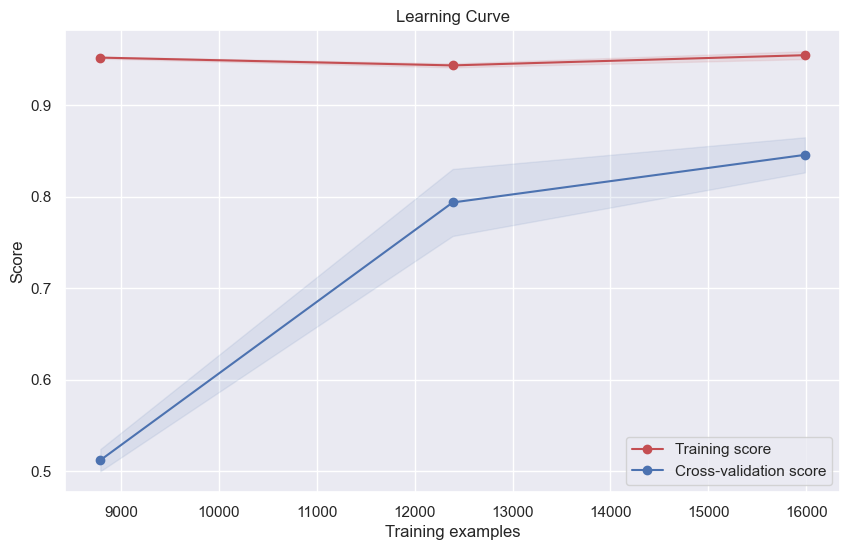

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="b",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

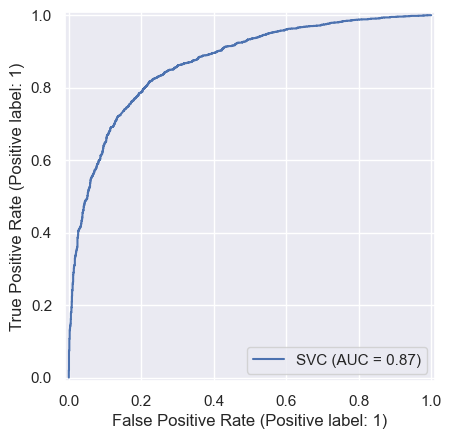

In [41]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix, classification report and AUC <a name="12"></a>

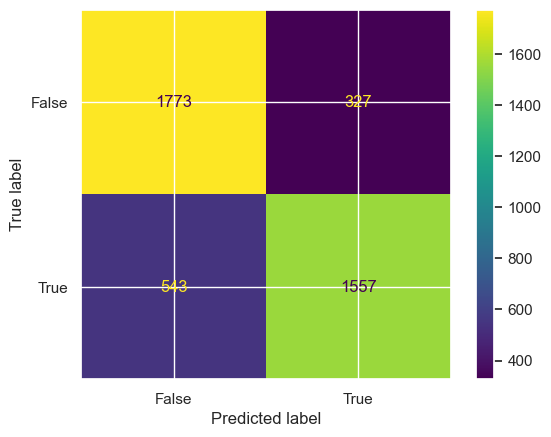

In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# SVC prediction
predicted = model.fit(X_train, y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [43]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.77      0.84      0.80      2100
Inactive (target 0)       0.83      0.74      0.78      2100

           accuracy                           0.79      4200
          macro avg       0.80      0.79      0.79      4200
       weighted avg       0.80      0.79      0.79      4200



[<a href="#content">Back to top</a>]